# 📚 Project Title
**Building and Evaluating Machine Learning and Deep Learning Models for English–Yoruba Language Classification and Translation**


### 📄 Project Overview:
This project explores both traditional machine learning and deep learning techniques to tackle tasks in English–Yoruba language processing.  
It covers:
- Language classification using Naive Bayes.
- Semantic clustering using K-Means on sentence embeddings.
- Machine translation using an RNN/LSTM-based sequence-to-sequence model.
- Fine-tuned multilingual Transformer-based translation model.  

Each model is evaluated using appropriate metrics such as accuracy, F1-score, BLEU, METEOR, and silhouette score.

---


## Naive bayers Text Classifcation

Classifying text either as yoruba language or english language.


In [1]:
import os 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import string
import re
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

import keras

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
import nltk

import tensorflow as tf


In [ ]:
import seaborn as sns

In [ ]:
np.random.seed(42)


In [ ]:
from google.colab import files
files.upload()
print("Done!")

Saving train.tsv to train.tsv
Done!


Setup and download files for use later.

In [ ]:
!pip install sacrebleu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 12.4 MB/s eta 0:00:00


In [ ]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=63443befadca988d338f35ef9e4bf78e634583084f163bcbf1d4fafde82b591e
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score


In [ ]:
!pip install transformers datasets evaluate sentencepiece

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 23.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip


--2025-04-30 20:11:59--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-04-30 20:11:59--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-04-30 20:11:59--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.3’

gl

In [ ]:
import pandas as pd
df = pd.read_csv('train.tsv', sep='\t')
df.head()

,English,Yoruba
0,Unit 1: What is Creative Commons?,﻿Ìdá 1: Kín ni Creative Commons?
1,This work is licensed under a Creative Commons...,Iṣẹ́ yìí wà lábẹ́ àṣẹ Creative Commons Attribu...
2,"Creative Commons is a set of legal tools, a no...",Creative Commons jẹ́ àwọn ọ̀kan-ò-jọ̀kan ohun-...
3,Creative Commons began in response to an outda...,Creative Commons bẹ̀rẹ̀ láti wá wọ̀rọ̀kọ̀ fi ṣ...
4,CC licenses are built on copyright and are des...,Àwọn àṣẹ CC jẹ mọ́ àṣẹ ẹni tí ó ní iṣẹ́-àtinúd...


--- Dataset Description ---

Size:
10070 sentence pairs
- Average English sentence length: 17.28 words
- Average Yoruba sentence length: 19.81 words
- Estimated English vocabulary size: 26359 unique words
- Estimated Yoruba vocabulary size: 23990 unique words


<ipython-input-75-a87853e7c20a>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['English'].fillna('', inplace=True)
<ipython-input-75-a87853e7c20a>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

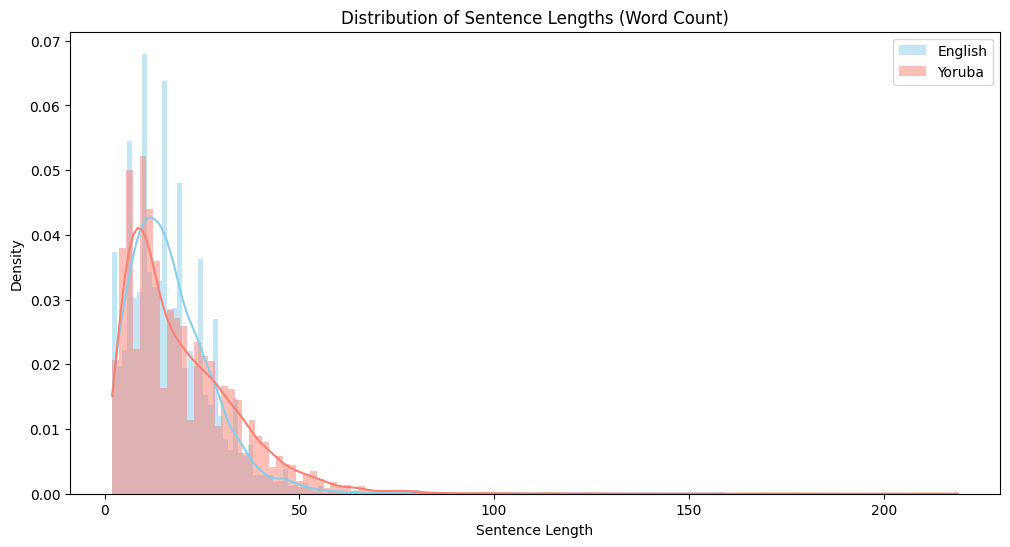

,English,Yoruba
0,Unit 1: What is Creative Commons?,﻿Ìdá 1: Kín ni Creative Commons?
1,This work is licensed under a Creative Commons...,Iṣẹ́ yìí wà lábẹ́ àṣẹ Creative Commons Attribu...
2,"Creative Commons is a set of legal tools, a no...",Creative Commons jẹ́ àwọn ọ̀kan-ò-jọ̀kan ohun-...
3,Creative Commons began in response to an outda...,Creative Commons bẹ̀rẹ̀ láti wá wọ̀rọ̀kọ̀ fi ṣ...
4,CC licenses are built on copyright and are des...,Àwọn àṣẹ CC jẹ mọ́ àṣẹ ẹni tí ó ní iṣẹ́-àtinúd...
...,...,...
10065,"For example, the magazine notes that more youn...","Bí àpẹẹrẹ, ìwé ìròyìn náà kíyè sí i pé ọ̀pọ̀ à..."
10066,"“Everybody is happy here,” the article states,...","Àpilẹ̀kọ náà sọ pé, “Ṣe ni inú gbogbo wọn ń dù..."
10067,"Brother Stephen Morris, who serves on the CPC,...","Arákùnrin Stephen Morris, tó jẹ́ ọkàn lára àwọ..."
10068,“While our aim in building a new branch proper...,“Bó tiẹ̀ jẹ́ pé kì í ṣe torí pé káwọn èèyàn lè...


In [ ]:
def analyze_dataset_(df):
    print("--- Dataset Description ---")

    dataset_size = len(df)
    print("\nSize:")
    print(f"{dataset_size} sentence pairs")

    # Calculate sentence lengths - ensure columns are treated as strings
    df['English_Length'] = df['English'].astype(str).str.split().str.len()
    df['Yoruba_Length'] = df['Yoruba'].astype(str).str.split().str.len()


    print(f"- Average English sentence length: {df['English_Length'].mean():.2f} words")
    print(f"- Average Yoruba sentence length: {df['Yoruba_Length'].mean():.2f} words")

    # Calculate vocabulary size (basic token count)
    english_vocab = set()
    # Handle potential NaN values by filling with empty strings before splitting
    df['English'].fillna('', inplace=True)
    df['English'].astype(str).str.split().apply(english_vocab.update)
    yoruba_vocab = set()
    df['Yoruba'].fillna('', inplace=True) # Handle potential NaN values
    df['Yoruba'].astype(str).str.split().apply(yoruba_vocab.update)


    print(f"- Estimated English vocabulary size: {len(english_vocab)} unique words")
    print(f"- Estimated Yoruba vocabulary size: {len(yoruba_vocab)} unique words")

    # Generate Sentence Length Distribution Plot
    plt.figure(figsize=(12, 6))
    sns.histplot(df['English_Length'], color="skyblue", label="English", kde=True, stat="density", linewidth=0)
    sns.histplot(df['Yoruba_Length'], color="salmon", label="Yoruba", kde=True, stat="density", linewidth=0)
    plt.title('Distribution of Sentence Lengths (Word Count)')
    plt.xlabel('Sentence Length')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    # Drop temporary length columns
    # Create a copy before dropping to avoid SettingWithCopyWarning if df is a slice
    df_cleaned = df.drop(columns=['English_Length', 'Yoruba_Length']).copy()

    # Return the modified DataFrame (or a copy if original needs preservation)
    return df_cleaned

analyze_dataset_(df)


## Data PreProcessing

The next step involves pre processing the data.

In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
def process_single_text(text):
  text = text.lower()
  tokens = word_tokenize(text)
  cleaned_text = " ".join(word for word in tokens if word.isalpha())
  return cleaned_text

def text_process(texts):
    preprocessed_text = []
    for text in texts:
      preprocessed_text.append(process_single_text(text))
    return preprocessed_text


In [ ]:
# extract X and Y from the dataset.
df_melted = pd.melt(df, var_name='Language', value_name='Text')
print("Length of the df", len(df_melted))
print("English languge data lenngth", len(df_melted[df_melted['Language'] == 'English']))
print("Yoruba languge data lenngth", len(df_melted[df_melted['Language'] == 'Yoruba']))
df_melted.head()

Length of the df 20140
English languge data lenngth 10070
Yoruba languge data lenngth 10070


,Language,Text
0,English,Unit 1: What is Creative Commons?
1,English,This work is licensed under a Creative Commons...
2,English,"Creative Commons is a set of legal tools, a no..."
3,English,Creative Commons began in response to an outda...
4,English,CC licenses are built on copyright and are des...


In [ ]:
X, Y = df_melted['Text'], df_melted['Language']

encoder = LabelEncoder()
Y = encoder.fit_transform(Y)
print(len(Y))
print(np.unique(Y))

20140
[0 1]


In [ ]:
x_processed = text_process(X)
x_processed[50], X[50]

('all creativity and knowledge build on what came before and the end of a copyright term ensures that copyrighted works eventually move into the public domain and thus join the pool of knowledge and creativity from which we can all freely draw to create new works',
 'All creativity and knowledge build on what came before, and the end of a copyright term ensures that copyrighted works eventually move into the public domain and thus join the pool of knowledge and creativity from which we can all freely draw to create new works.')

Vectorizing training data.

In [ ]:
# Using Count vectorizer
vectorizer = CountVectorizer(max_features=10000)
x_vec_count = vectorizer.fit_transform(x_processed)
print(x_vec_count.shape)
# Using Tfidf
vectorizer = TfidfVectorizer(max_features=10000)
x_vec_tfidf = vectorizer.fit_transform(x_processed)
print(x_vec_tfidf.shape)


(20140, 10000)
(20140, 10000)


In [ ]:
x_vec_tfidf[9], x_vec_count[9]

(<Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 18 stored elements and shape (1, 10000)>,
 <Compressed Sparse Row sparse matrix of dtype 'int64'
 	with 18 stored elements and shape (1, 10000)>)

In [ ]:
split_tfidf =  train_test_split(x_vec_tfidf, Y, test_size=0.2, random_state=42)
split_count =  train_test_split(x_vec_count, Y, test_size=0.2, random_state=42)

Creating a NB model

In [ ]:
model_multinomial_tfidf = MultinomialNB()
model_multinomial_tfidf.fit(split_tfidf[0], split_tfidf[2])

MultinomialNB()

In [ ]:
model_multinomial_count = MultinomialNB()
model_multinomial_count.fit(split_count[0], split_count[2])

MultinomialNB()

In [ ]:
def eval_model(model, test_set, class_names=None, title="Confusion Matrix English Yoruba Classifcation"):
    """
    Evaluates a trained classification model on a given test set.
    """
    X_test, y_test = test_set
    y_pred = model.predict(X_test)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred) * 100
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))

    # Print accuracy
    print(f"Accuracy: {acc:.2f}%")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="PuBu", linewidths=0.5, cbar=True,
                xticklabels=class_names if class_names else 'auto',
                yticklabels=class_names if class_names else 'auto')
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()



def predict_single(text, model, vectorizer, encoder):
    """
    Predicts the class of a single text string.
    """

    # Vectorize the cleaned text
    text_vectorized = vectorizer.transform([text])
    # Predict
    pred_encoded = model.predict(text_vectorized)
    # Decode prediction
    pred_label = encoder.inverse_transform(pred_encoded)[0]
    return pred_label



In [ ]:
def tune_and_evaluate_svm(X_train, y_train, X_test, y_test, param_grid, model, label_classes=None, title=""):
    """
    Performs hyperparameter tuning using GridSearchCV on an SVM classifier,
    then evaluates the best model on the test set.
    """


    grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                               cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print(f"\n✅ Best Parameters: {best_params}")
    print(f"📈 Cross-validated Accuracy: {best_score:.4f}")

    # Predict and evaluate
    y_pred = best_model.predict(X_test)

    print("\n📊 Evaluation on Test Set:")
    eval_model(best_model, (X_test, y_test), label_classes, title)
    return best_model


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2034
           1       1.00      0.99      1.00      1994

    accuracy                           1.00      4028
   macro avg       1.00      1.00      1.00      4028
weighted avg       1.00      1.00      1.00      4028

Accuracy: 99.55%


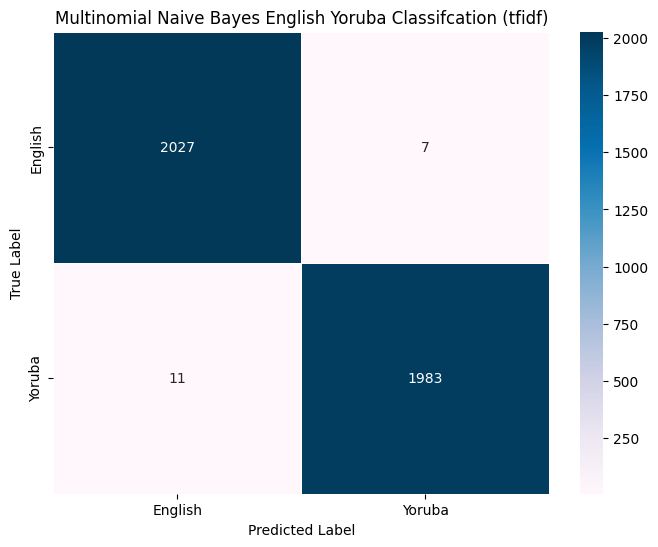

In [ ]:
eval_model(model_multinomial_tfidf, (split_tfidf[1], split_tfidf[3]), list(encoder.classes_), "Multinomial Naive Bayes English Yoruba Classifcation (tfidf)" )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2034
           1       1.00      1.00      1.00      1994

    accuracy                           1.00      4028
   macro avg       1.00      1.00      1.00      4028
weighted avg       1.00      1.00      1.00      4028

Accuracy: 99.63%


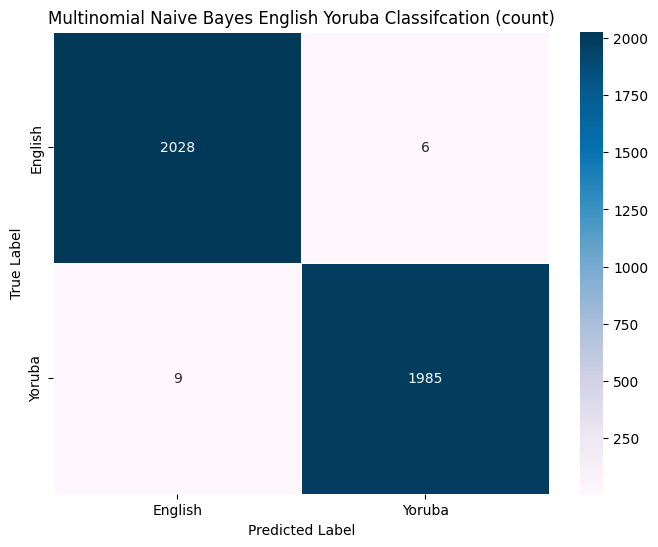

In [ ]:
eval_model(model_multinomial_count, (split_count[1], split_count[3]), list(encoder.classes_), "Multinomial Naive Bayes English Yoruba Classifcation (count)" )

In [ ]:
predict_single("bawo ni oremi", model_multinomial_tfidf, vectorizer, encoder)

'Yoruba'

In [ ]:
predict_single("bawo ni oremi", model_multinomial_count, vectorizer, encoder)

'Yoruba'

**Hyper parameter tuning**

Fitting 5 folds for each of 6 candidates, totalling 30 fits

✅ Best Parameters: {'alpha': 10.0}
📈 Cross-validated Accuracy: 0.9966

📊 Evaluation on Test Set:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2034
           1       1.00      0.99      1.00      1994

    accuracy                           1.00      4028
   macro avg       1.00      1.00      1.00      4028
weighted avg       1.00      1.00      1.00      4028

Accuracy: 99.58%


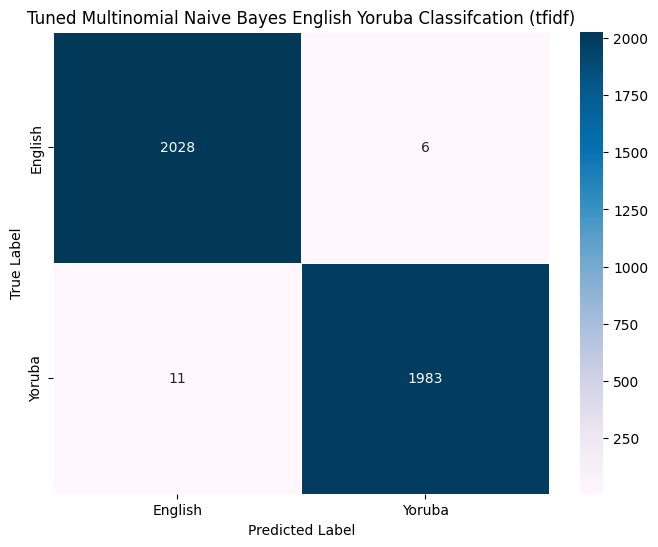

MultinomialNB(alpha=10.0)

In [ ]:
# Define the parameter grid
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]}
# Initialize the MultinomialNB model
model = MultinomialNB()
tune_and_evaluate_svm(split_tfidf[0], split_tfidf[2], split_tfidf[1], split_tfidf[3], param_grid, model, list(encoder.classes_), "Tuned Multinomial Naive Bayes English Yoruba Classifcation (tfidf)")

Fitting 5 folds for each of 6 candidates, totalling 30 fits

✅ Best Parameters: {'alpha': 1.0}
📈 Cross-validated Accuracy: 0.9966

📊 Evaluation on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2034
           1       1.00      1.00      1.00      1994

    accuracy                           1.00      4028
   macro avg       1.00      1.00      1.00      4028
weighted avg       1.00      1.00      1.00      4028

Accuracy: 99.63%


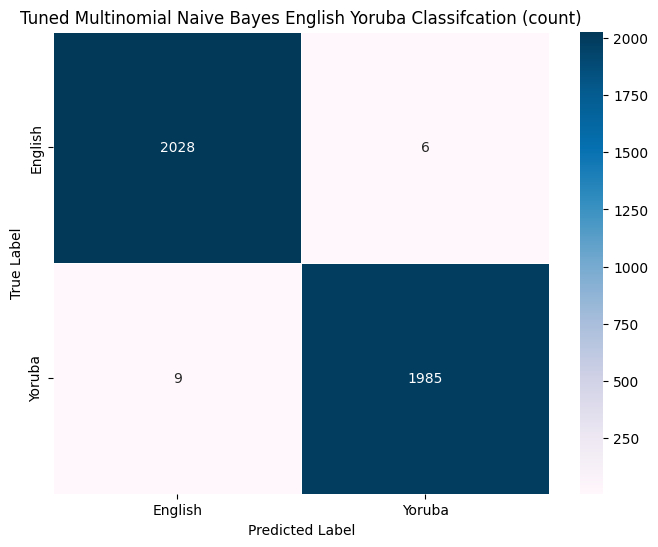

MultinomialNB()

In [ ]:
model = MultinomialNB()
tune_and_evaluate_svm(split_count[0], split_count[2], split_count[1], split_count[3], param_grid, model, list(encoder.classes_), "Tuned Multinomial Naive Bayes English Yoruba Classifcation (count)")

## Using SVM for English - Yoruba Language Classifcation.

In [ ]:
df_melted['clean_text'] = df_melted['Text'].apply(process_single_text)

In [ ]:
X = df_melted['clean_text']
y = df_melted['Language']

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=10000)
tfidf.fit(x_train)

count = CountVectorizer(max_features=10000)
count.fit(x_train)

CountVectorizer(max_features=10000)

In [ ]:
X_train_tfidf = tfidf.transform(x_train)
X_test_tfidf = tfidf.transform(x_test)
X_train_count = count.transform(x_train)
X_test_count = count.transform(x_test)

In [ ]:
# Train SVM
svm_model_tfidf = svm.SVC(kernel='linear', C=1.0)
svm_model_tfidf.fit(X_train_tfidf, y_train)



SVC(kernel='linear')

In [ ]:
svm_model_count = svm.SVC(kernel='linear', C=1.0)
svm_model_count.fit(X_train_count, y_train)

SVC(kernel='linear')

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2034
           1       0.99      0.99      0.99      1994

    accuracy                           0.99      4028
   macro avg       0.99      0.99      0.99      4028
weighted avg       0.99      0.99      0.99      4028

Accuracy: 99.33%


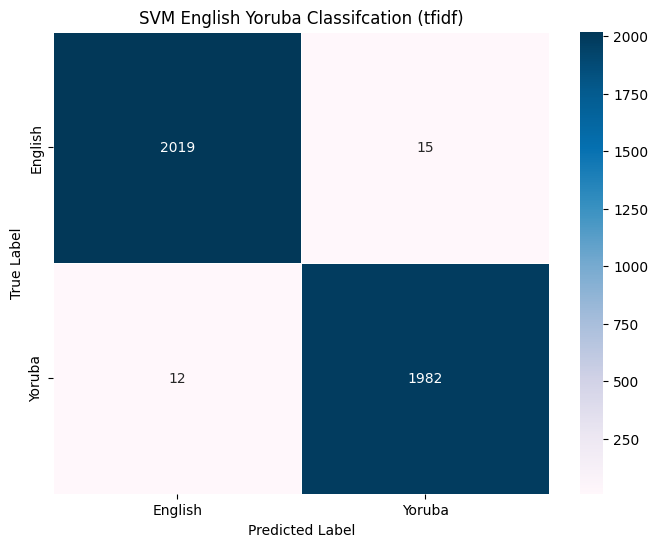

In [ ]:
# Predict
y_pred_tfidf = svm_model_tfidf.predict(X_test_tfidf)
y_pred_count = svm_model_count.predict(X_test_count)

eval_model(svm_model_tfidf, (X_test_tfidf, y_test), list(encoder.classes_), "SVM English Yoruba Classifcation (tfidf)")


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2034
           1       0.98      0.99      0.99      1994

    accuracy                           0.99      4028
   macro avg       0.99      0.99      0.99      4028
weighted avg       0.99      0.99      0.99      4028

Accuracy: 98.96%


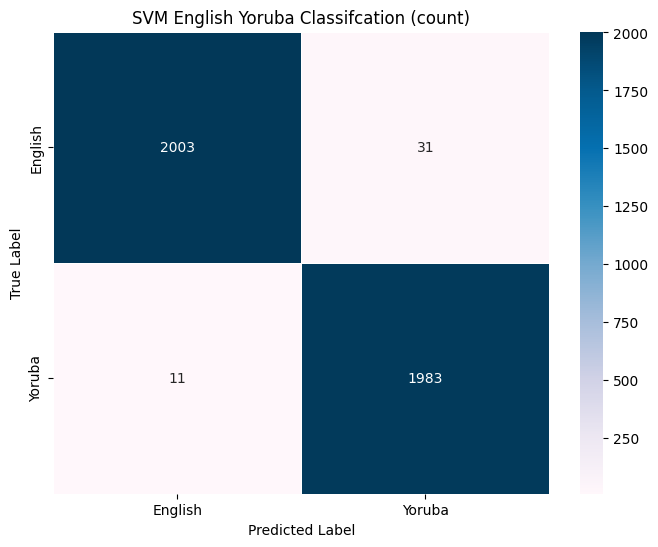

In [ ]:
eval_model(svm_model_count, (X_test_count, y_test), list(encoder.classes_), "SVM English Yoruba Classifcation (count)")

Fitting 5 folds for each of 12 candidates, totalling 60 fits

✅ Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
📈 Cross-validated Accuracy: 0.9952

📊 Evaluation on Test Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2034
           1       0.99      0.99      0.99      1994

    accuracy                           0.99      4028
   macro avg       0.99      0.99      0.99      4028
weighted avg       0.99      0.99      0.99      4028

Accuracy: 99.40%


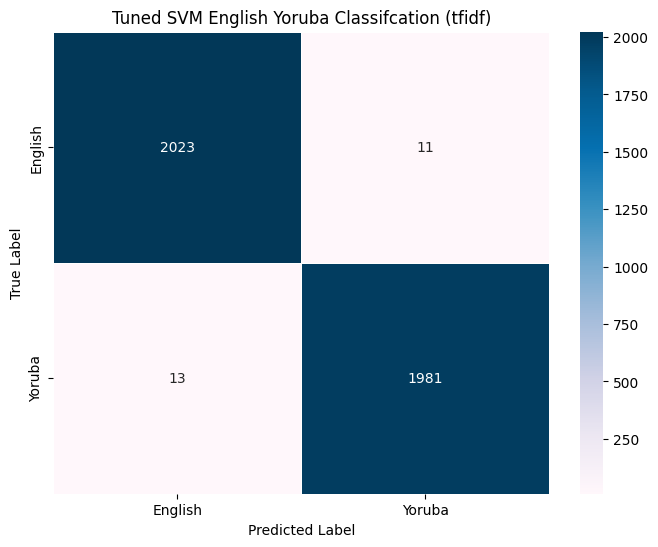

SVC(C=0.1, kernel='linear')

In [ ]:
# Define parameter grid
param_grid = {
  'C': [0.1, 1.0, 10.0],
  'kernel': ['linear', 'rbf'],
  'gamma': ['scale', 'auto']
}

tune_and_evaluate_svm(X_train_tfidf, y_train, X_test_tfidf, y_test, param_grid, svm.SVC(), list(encoder.classes_), "Tuned SVM English Yoruba Classifcation (tfidf)")


Fitting 5 folds for each of 12 candidates, totalling 60 fits

✅ Best Parameters: {'C': 1.0, 'gamma': 'scale', 'kernel': 'linear'}
📈 Cross-validated Accuracy: 0.9868

📊 Evaluation on Test Set:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2034
           1       0.98      0.99      0.99      1994

    accuracy                           0.99      4028
   macro avg       0.99      0.99      0.99      4028
weighted avg       0.99      0.99      0.99      4028

Accuracy: 98.96%


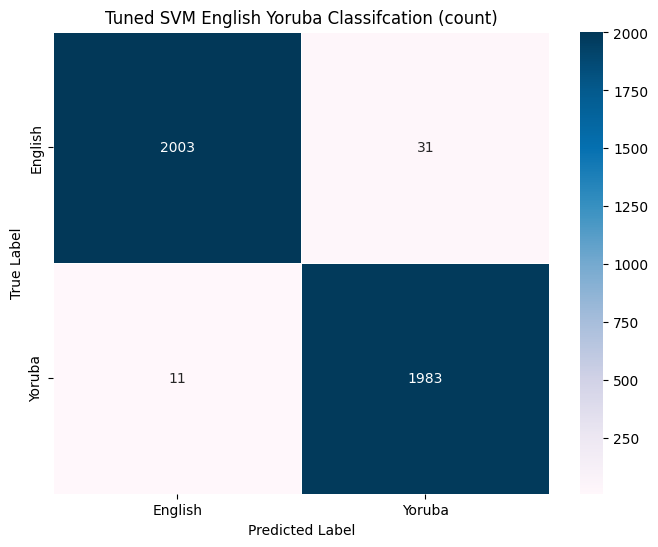

SVC(kernel='linear')

In [ ]:
tune_and_evaluate_svm(X_train_count, y_train, X_test_count, y_test, param_grid, svm.SVC(), list(encoder.classes_), "Tuned SVM English Yoruba Classifcation (count)")

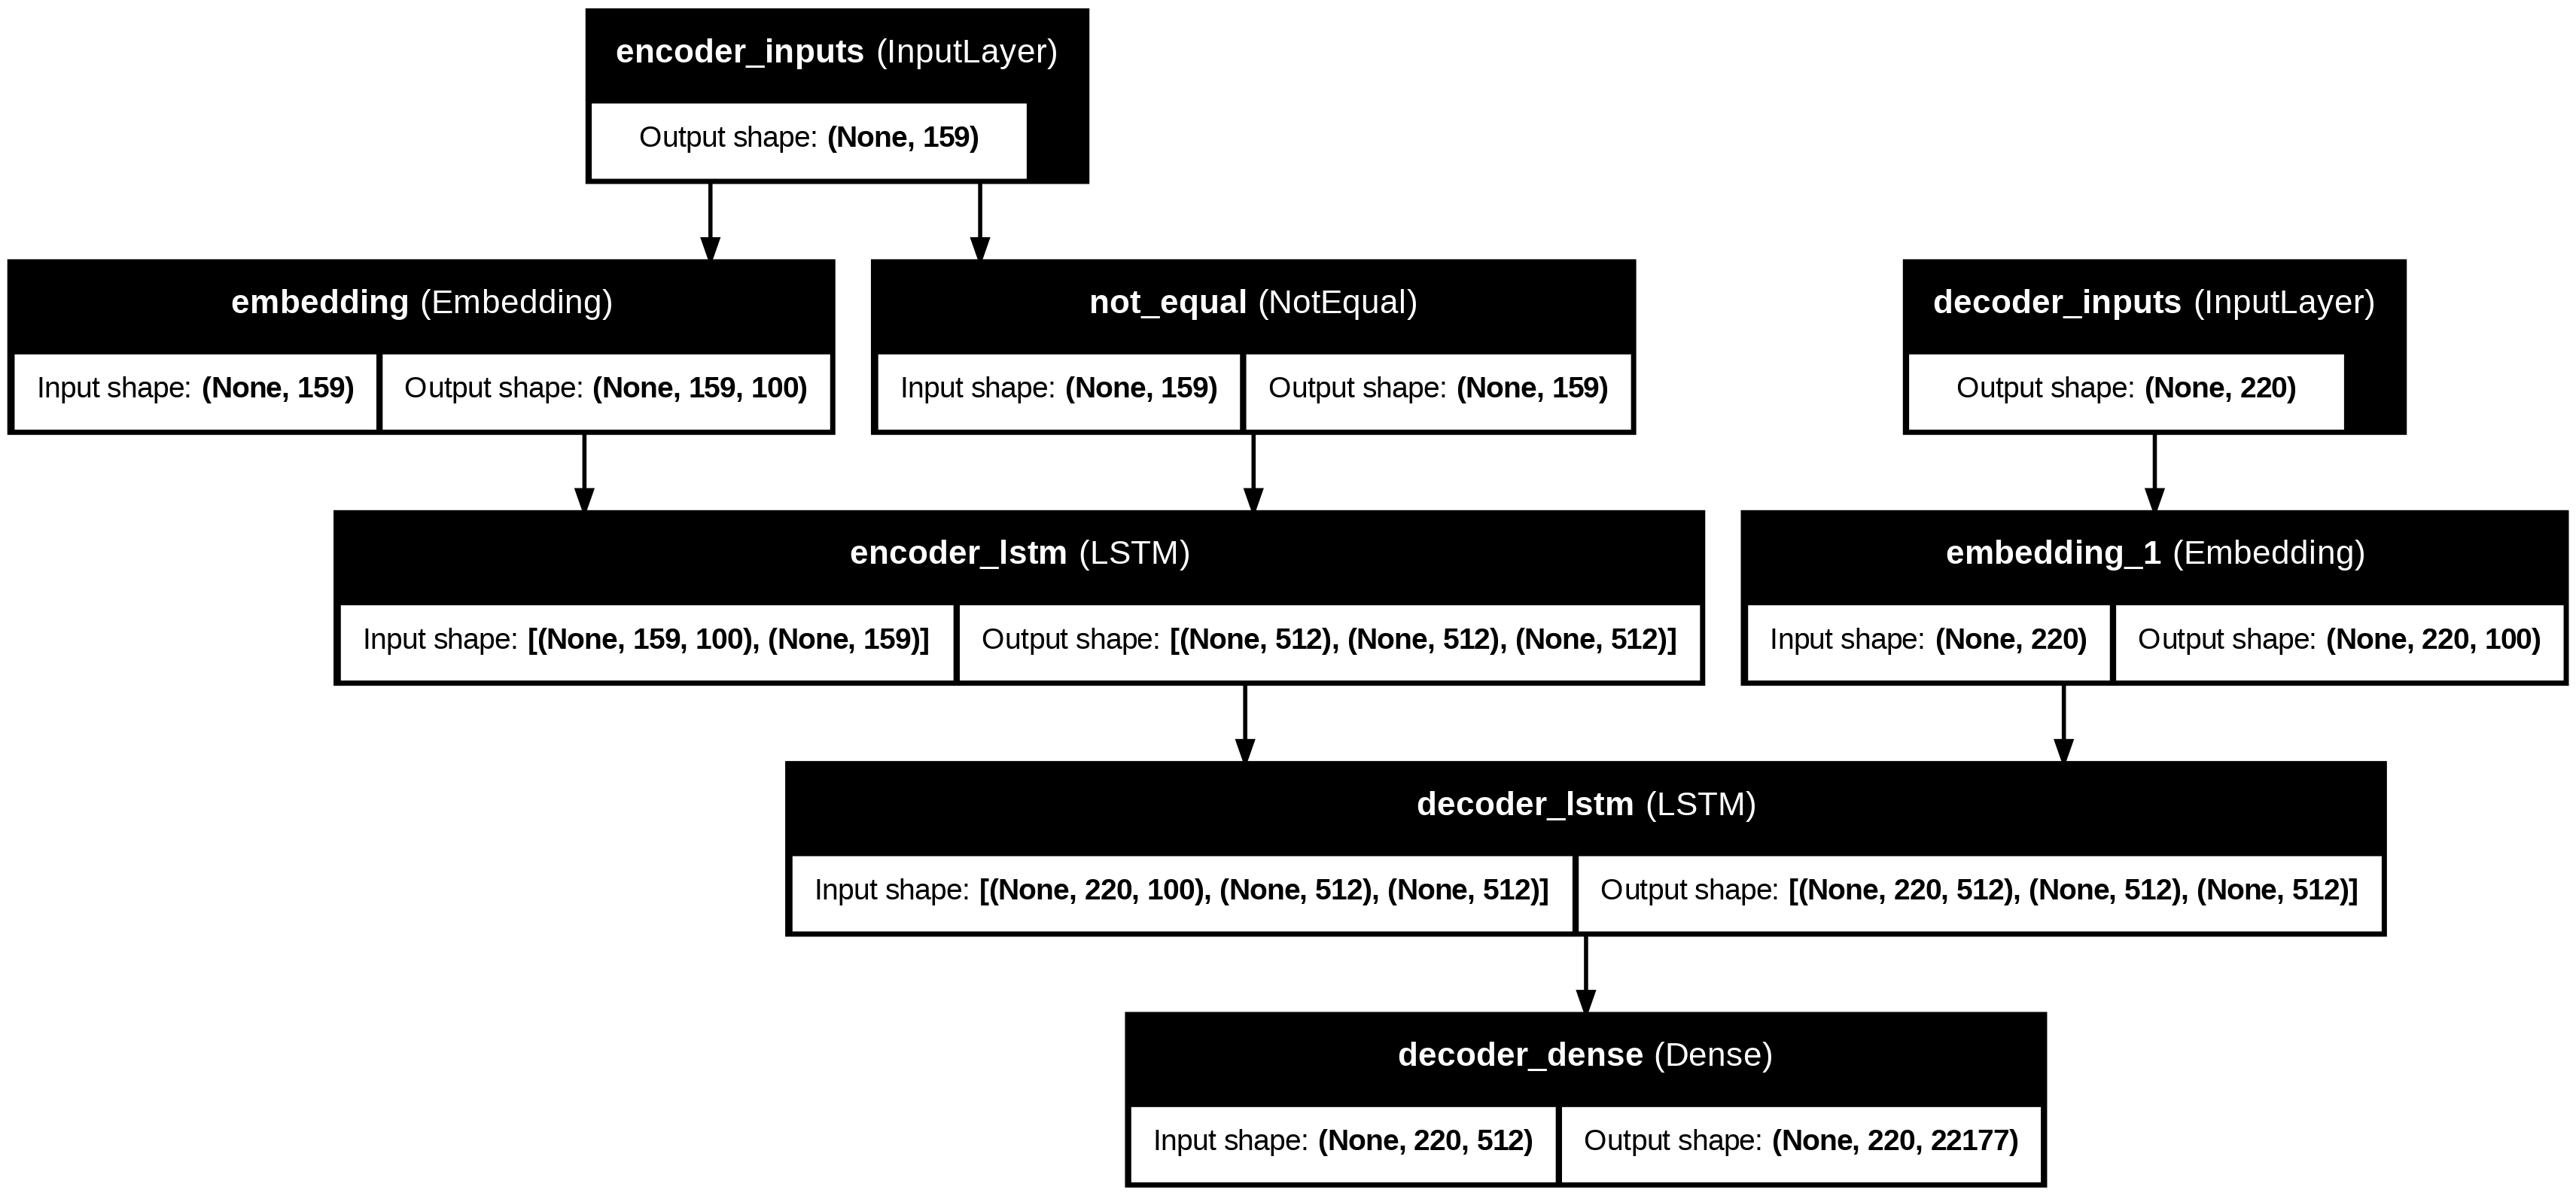

In [ ]:
# tf.keras.utils.plot_model(model, to_file='model_trn_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9801596771568232849
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 40419328000
locality {
  bus_id: 1
  links {
  }
}
incarnation: 18037634026917201591
physical_device_desc: "device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:00:04.0, compute capability: 8.0"
xla_global_id: 416903419
]


In [ ]:
from datasets import Dataset

df = pd.read_csv('train.tsv', sep='\t')
# Convert to Hugging Face Dataset
dataset = Dataset.from_pandas(df)
dataset = dataset.train_test_split(test_size=0.2)


# Load tokenizer and model

In [ ]:
import tensorflow
from transformers import AutoTokenizer, TFAutoModelForSeq2SeqLM

checkpoint = "t5-small"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = TFAutoModelForSeq2SeqLM.from_pretrained(checkpoint)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


In [ ]:
tensorflow.__version__

'2.18.0'

# Preprpocess the data

In [ ]:
# We need text data from the target language (Yoruba) training split
def get_training_corpus():
    # Access the training split of your dataset
    training_dataset = dataset["train"]
    # Iterate through the 'Yoruba' column in batches
    print("Generating training corpus for tokenizer...")
    for i in range(0, len(training_dataset), 1000):
        yield training_dataset[i : i + 1000]["Yoruba"]

# Train a new tokenizer on your target language data
print(f"Training new tokenizer from iterator with original vocab size: {len(tokenizer.vocab)}")
yoruba_tokenizer = tokenizer.train_new_from_iterator(
    get_training_corpus(),
    vocab_size=52000,
)
print(f"New tokenizer vocabulary size: {len(yoruba_tokenizer.vocab)}")


Training new tokenizer from iterator with original vocab size: 32100
Generating training corpus for tokenizer...
New tokenizer vocabulary size: 13277


In [ ]:
source_lang = "English"
target_lang = "Yoruba"
prefix = "translate English to Yoruba: " # T5 prefix for translation


def preprocess_function(examples):
    # Access the columns directly by their names 'English' and 'Yoruba'
    # examples is a dictionary with list values when batched=True
    inputs = [prefix + example for example in examples[source_lang]]
    targets = [example for example in examples[target_lang]]

    # Use the *newly trained* tokenizer (yoruba_tokenizer)
    # to tokenize both inputs and targets
    model_inputs = yoruba_tokenizer(inputs, max_length=128, truncation=True)

    # Tokenize targets separately for the decoder input IDs
    labels = yoruba_tokenizer(text_target=targets, max_length=128, truncation=True)

    # Assign the tokenized labels to the 'labels' key
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# Apply the preprocessing function to  dataset
# Apply it to the entire DatasetDict to preprocess both train and test splits
print("Applying preprocessing function to dataset...")
tokenized_dataset = dataset.map(preprocess_function, batched=True)


Applying preprocessing function to dataset...


Map:   0%|          | 0/8056 [00:00<?, ? examples/s]

Map:   0%|          | 0/2014 [00:00<?, ? examples/s]

In [ ]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer=yoruba_tokenizer, model=checkpoint)

tf_train_set = model.prepare_tf_dataset(
    tokenized_dataset["train"],
    shuffle=True,
    batch_size=16,
    collate_fn=data_collator,
)

tf_test_set = model.prepare_tf_dataset(
    tokenized_dataset["test"],
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator,
)


/usr/local/lib/python3.11/dist-packages/transformers/data/data_collator.py:741: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  batch["labels"] = torch.tensor(batch["labels"], dtype=torch.int64)


Pre traiing

In [ ]:
from transformers import AdamWeightDecay
import tensorflow as tf

learning_rate = 2e-5
weight_decay_rate = 0.01

optimizer = AdamWeightDecay(
    learning_rate=learning_rate, weight_decay_rate=weight_decay_rate
)


In [ ]:
import evaluate
import numpy as np

bleu_metric = evaluate.load("bleu")
rouge_metric = evaluate.load("rouge")


# Helper function for postprocessing the text
def postprocess_text(preds, labels):
    preds = [pred.strip() for pred in preds]
    labels = [[label.strip()] for label in labels]

    return preds, labels


def compute_metrics(eval_preds):
    preds, labels = eval_preds
    if isinstance(preds, tuple):
        preds = preds[0] # Get the predictions from the tuple

    # Decode predictions and labels back to text using the *newly trained* tokenizer
    decoded_preds = yoruba_tokenizer.batch_decode(preds, skip_special_tokens=True)

    # Replace -100 in labels with the pad token id so we can decode them
    labels = np.where(labels != -100, labels, yoruba_tokenizer.pad_token_id)
    decoded_labels = yoruba_tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Postprocess the decoded texts
    decoded_preds, decoded_labels = postprocess_text(decoded_preds, decoded_labels)

    # Compute BLEU score
    bleu_result = bleu_metric.compute(predictions=decoded_preds, references=decoded_labels)
    bleu_score = bleu_result["score"]

    # Compute ROUGE score (specifically ROUGE-L)
    rouge_result = rouge_metric.compute(predictions=decoded_preds, references=decoded_labels)
    rouge_l_score = rouge_result["rougeL"] # Get ROUGE-L score

    # Calculate generated length
    prediction_lens = [np.count_nonzero(pred != yoruba_tokenizer.pad_token_id) for pred in preds]
    gen_len = np.mean(prediction_lens)

    # Return a dictionary of results
    result = {"bleu": bleu_score, "rougeL": rouge_l_score, "gen_len": gen_len}

    # Round metrics for cleaner output
    result = {k: round(v, 4) for k, v in result.items()}
    return result


In [ ]:
from transformers.keras_callbacks import KerasMetricCallback, PushToHubCallback
import tensorflow as tf # Make sure tf is imported

#  computes  metrics on the test set after each epoch
# metric_callback = KerasMetricCallback(
#     eval_dataset=tf_test_set,
#     predict_with_generate=True

# )
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', # Monitor validation loss
    patience=5,
    restore_best_weights=True
)
callbacks = [
    early_stopping_callback
]


In [ ]:
model.compile(optimizer=optimizer)
epochs = 100

print("Model compiled.")
print(f"Starting training for {epochs} epochs...")

# 8. Train the model
history = model.fit(
    x=tf_train_set,
    validation_data=tf_test_set,
    epochs=epochs,
    callbacks=callbacks,
)

print("Training finished.")


Model compiled.
Starting training for 100 epochs...
Epoch 1/100
503/503 [==============================] - 42s 64ms/step - loss: 7.1458 - val_loss: 6.8915
Epoch 2/100
503/503 [==============================] - 28s 56ms/step - loss: 7.0515 - val_loss: 6.8168
Epoch 3/100
503/503 [==============================] - 28s 55ms/step - loss: 6.9782 - val_loss: 6.7572
Epoch 4/100
503/503 [==============================] - 28s 55ms/step - loss: 6.9174 - val_loss: 6.6900
Epoch 5/100
503/503 [==============================] - 28s 56ms/step - loss: 6.8508 - val_loss: 6.6302
Epoch 6/100
503/503 [==============================] - 28s 55ms/step - loss: 6.7890 - val_loss: 6.5715
Epoch 7/100
503/503 [==============================] - 28s 56ms/step - loss: 6.7369 - val_loss: 6.5138
Epoch 8/100
503/503 [==============================] - 28s 55ms/step - loss: 6.6823 - val_loss: 6.4640
Epoch 9/100
503/503 [==============================] - 28s 56ms/step - loss: 6.6345 - val_loss: 6.4165
Epoch 10/100
503/503 

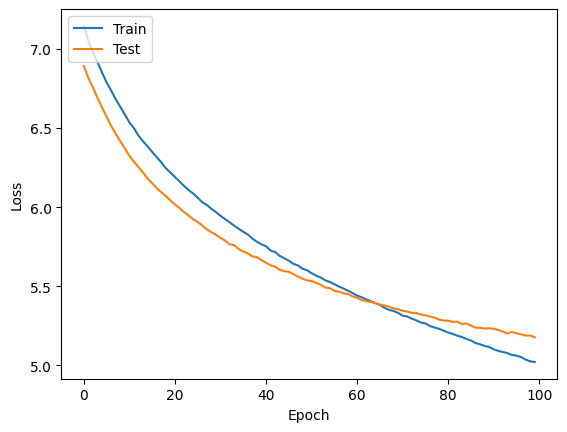

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Save the entire model locally
model.save_pretrained("./my_local_model")
tokenizer.save_pretrained("./my_local_model")


('./my_local_model/tokenizer_config.json',
 './my_local_model/special_tokens_map.json',
 './my_local_model/spiece.model',
 './my_local_model/added_tokens.json',
 './my_local_model/tokenizer.json')

In [ ]:
from transformers import pipeline

translator = pipeline("text2text-generation", model=model, tokenizer=tokenizer)
result = translator(f"{prefix} have you eaten?")
print(result)


Device set to use 0


[{'generated_text': 'Yoruba: haben Sie gegessen?'}]


In [ ]:
df.tail()

,English,Yoruba
10065,"For example, the magazine notes that more youn...","Bí àpẹẹrẹ, ìwé ìròyìn náà kíyè sí i pé ọ̀pọ̀ à..."
10066,"“Everybody is happy here,” the article states,...","Àpilẹ̀kọ náà sọ pé, “Ṣe ni inú gbogbo wọn ń dù..."
10067,"Brother Stephen Morris, who serves on the CPC,...","Arákùnrin Stephen Morris, tó jẹ́ ọkàn lára àwọ..."
10068,“While our aim in building a new branch proper...,“Bó tiẹ̀ jẹ́ pé kì í ṣe torí pé káwọn èèyàn lè...
10069,All recognition ultimately goes to Jehovah and...,"Jèhófà ni gbogbo ìyìn àti ọpẹ́ tọ́ sí, fún àwọ..."


In [ ]:
from datasets import Dataset

df = pd.read_csv('train.tsv', sep='\t')
# Convert to Hugging Face Dataset
dataset = Dataset.from_pandas(df)

dataset

Dataset({
    features: ['English', 'Yoruba'],
    num_rows: 10070
})

In [ ]:
dataset = dataset.train_test_split(test_size=0.2)
dataset

DatasetDict({
    train: Dataset({
        features: ['English', 'Yoruba'],
        num_rows: 8056
    })
    test: Dataset({
        features: ['English', 'Yoruba'],
        num_rows: 2014
    })
})

In [ ]:
from transformers import AutoTokenizer, TFAutoModelForSeq2SeqLM

checkpoint = "t5-small"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = TFAutoModelForSeq2SeqLM.from_pretrained(checkpoint)


All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


In [ ]:
source_lang = "English"
target_lang = "Yoruba"
prefix = "translate English to Yoruba: "

def preprocess_function(examples):
    inputs = [prefix + text for text in examples[source_lang]]
    targets = [text for text in examples[target_lang]]
    return tokenizer(inputs, text_target=targets, max_length=128, truncation=True)

tokenized_translations = dataset.map(preprocess_function, batched=True)


Map:   0%|          | 0/8056 [00:00<?, ? examples/s]

Map:   0%|          | 0/2014 [00:00<?, ? examples/s]

In [ ]:
tokenized_translations

DatasetDict({
    train: Dataset({
        features: ['English', 'Yoruba', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 8056
    })
    test: Dataset({
        features: ['English', 'Yoruba', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 2014
    })
})

In [ ]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=checkpoint)

tf_train_set = model.prepare_tf_dataset(
    tokenized_translations["train"],
    shuffle=True,
    batch_size=16,
    collate_fn=data_collator,
)

tf_test_set = model.prepare_tf_dataset(
    tokenized_translations["test"],
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator,
)


/usr/local/lib/python3.11/dist-packages/transformers/data/data_collator.py:741: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  batch["labels"] = torch.tensor(batch["labels"], dtype=torch.int64)


In [ ]:
from transformers import AdamWeightDecay
import tensorflow as tf

optimizer = AdamWeightDecay(learning_rate=2e-5, weight_decay_rate=0.01)
model.compile(optimizer=optimizer)


In [ ]:
from evaluate import load
from transformers.keras_callbacks import KerasMetricCallback
import numpy as np

# Load both metrics
bleu_metric = load("bleu")
sacrebleu_metric = load("sacrebleu")

def postprocess_text(preds, labels):
    preds = [pred.strip() for pred in preds]
    labels = [label.strip() for label in labels]
    return preds, labels

def compute_metrics(eval_preds):
    preds, labels = eval_preds
    if isinstance(preds, tuple):
        preds = preds[0]

    # Decode predictions and labels
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)

    # Replace -100 with pad_token_id for decoding
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Postprocess (remove leading/trailing whitespace)
    decoded_preds, decoded_labels = postprocess_text(decoded_preds, decoded_labels)

    # Compute BLEU
    bleu_result = bleu_metric.compute(predictions=decoded_preds, references=decoded_labels)
    sacrebleu_result = sacrebleu_metric.compute(predictions=decoded_preds, references=decoded_labels)

    # Prediction lengths for info
    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in preds]

    result = {
        "bleu": round(bleu_result["score"], 4),
        "sacrebleu": round(sacrebleu_result["score"], 4),
        "gen_len": round(np.mean(prediction_lens), 4),
    }

    return result

# Metric callback for Keras
metric_callback = KerasMetricCallback(metric_fn=compute_metrics, eval_dataset=tf_test_set)


In [ ]:
callbacks = [ tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)]

In [ ]:
history = model.fit(x=tf_train_set, validation_data=tf_test_set, epochs=5, callbacks=callbacks)

Epoch 1/5
503/503 [==============================] - 51s 68ms/step - loss: 2.9575 - val_loss: 2.4931
Epoch 2/5
503/503 [==============================] - 30s 60ms/step - loss: 2.5212 - val_loss: 2.2774
Epoch 3/5
503/503 [==============================] - 30s 60ms/step - loss: 2.3632 - val_loss: 2.1613
Epoch 4/5
503/503 [==============================] - 30s 59ms/step - loss: 2.2693 - val_loss: 2.0876
Epoch 5/5
503/503 [==============================] - 30s 59ms/step - loss: 2.1993 - val_loss: 2.0307


In [ ]:
from transformers import pipeline
translator = pipeline("text2text-generation", model=model, tokenizer=tokenizer)
result = translator(f"{prefix} how are you")
print(result)

Device set to use 0


[{'generated_text': '         '}]


In [ ]:


import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import TextVectorization
import pandas as pd
import numpy as np

BATCH_SIZE          = 64
EMBED_DIM           = 256
LATENT_DIM          = 512
EPOCHS              = 30
MAX_TOKENS_SRC      = 20000
MAX_TOKENS_TGT      = 20000
MAX_LEN_SRC         = 40
MAX_LEN_TGT         = 40


# Add <sos> and <eos> to Yoruba
df['Yoruba'] = df['Yoruba'].apply(lambda x: '[SOS] ' + x + ' [EOS]')

eng_vec = TextVectorization(
    standardize='lower',
    max_tokens=MAX_TOKENS_SRC,
    output_mode='int',
    output_sequence_length=MAX_LEN_SRC
)

yor_vec = TextVectorization(
    standardize='lower',
    max_tokens=MAX_TOKENS_TGT,
    output_mode='int',
    output_sequence_length=MAX_LEN_TGT+1  # +1 for shifted target
)

# Fit vocabularies
eng_vec.adapt(df['English'])
yor_vec.adapt(df['Yoruba'])

# Vocabulary sizes
vocab_size_src = eng_vec.vocabulary_size()
vocab_size_tgt = yor_vec.vocabulary_size()

# ========= tf.data pipeline =========
def format_batch(src, tgt):
    src = eng_vec(src)
    tgt = yor_vec(tgt)
    tgt_in  = tgt[:, :-1]          # all tokens except last
    tgt_out = tgt[:, 1:]           # all tokens except first
    return ({"encoder_in": src,
             "decoder_in": tgt_in},
            tgt_out)

dataset = tf.data.Dataset.from_tensor_slices(
    (df['English'].values, df['Yoruba'].values)
).shuffle(len(df)).batch(BATCH_SIZE).map(format_batch).prefetch(tf.data.AUTOTUNE)

# ========= Model =========
# Encoder
enc_inputs = Input(shape=(None,), dtype='int32', name='encoder_in')
x = Embedding(vocab_size_src, EMBED_DIM, mask_zero=True)(enc_inputs)
_, state_h, state_c = LSTM(LATENT_DIM, return_state=True)(x)
enc_states = [state_h, state_c]

# Decoder
dec_inputs = Input(shape=(None,), dtype='int32', name='decoder_in')
dec_emb = Embedding(vocab_size_tgt, EMBED_DIM, mask_zero=True)(dec_inputs)
dec_lstm = LSTM(LATENT_DIM, return_sequences=True, return_state=True)
dec_outputs, _, _ = dec_lstm(dec_emb, initial_state=enc_states)
dec_dense = Dense(vocab_size_tgt, activation='softmax')
dec_outputs = dec_dense(dec_outputs)

model = Model([enc_inputs, dec_inputs], dec_outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# ========= Training =========
history = model.fit(dataset, epochs=EPOCHS)

# ========= Inference models =========
# Encoder model (same as training)
encoder_model = Model(enc_inputs, enc_states)

# Decoder model for one step at a time
decoder_state_input_h = Input(shape=(LATENT_DIM,))
decoder_state_input_c = Input(shape=(LATENT_DIM,))
dec_states_inputs = [decoder_state_input_h, decoder_state_input_c]

dec_emb2 = Embedding(vocab_size_tgt, EMBED_DIM, mask_zero=True)(dec_inputs)
dec_outputs2, state_h2, state_c2 = dec_lstm(dec_emb2, initial_state=dec_states_inputs)
dec_states2 = [state_h2, state_c2]
dec_outputs2 = dec_dense(dec_outputs2)

decoder_model = Model(
    [dec_inputs] + dec_states_inputs,
    [dec_outputs2] + dec_states2
)

# ========= Index lookup helpers =========
idx2tgt = np.array(yor_vec.get_vocabulary())
sos_idx = yor_vec('[SOS]')[0]
eos_idx = yor_vec('[EOS]')[0]

def translate(sentence: str, max_len: int = MAX_LEN_TGT) -> str:
    """Greedy decoding of a single English sentence."""
    src_seq = eng_vec(tf.constant([sentence]))
    states_value = encoder_model.predict(src_seq)

    tgt_seq = np.array([[sos_idx]])
    decoded = []

    for _ in range(max_len):
        output_tokens, h, c = decoder_model.predict([tgt_seq] + states_value)
        sampled_token_idx = np.argmax(output_tokens[0, -1, :])
        if sampled_token_idx == eos_idx:
            break
        decoded.append(idx2tgt[sampled_token_idx])
        tgt_seq = np.array([[sampled_token_idx]])
        states_value = [h, c]
    return ' '.join(decoded)

if __name__ == '__main__':
    test = "How are you?"
    print("English:", test)
    print("Yoruba:", translate(test))

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_in          │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_in          │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, None, 256) │  5,120,000 │ encoder_in[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, None)      │          0 │ encoder_in[0][0]  │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, None, 256) │  5,120,000 │ decoder_in[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ [(None, 512),     │  1,574,912 │ embedding[0][0],  │
│                     │ (None, 512),      │            │ not_equal[0][0]   │
│                     │ (None, 512)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ [(None, None,     │  1,574,912 │ embedding_1[0][0… │
│                     │ 512), (None,      │            │ lstm[0][1],       │
│                     │ 512), (None,      │            │ lstm[0][2]        │
│                     │ 512)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, None,      │ 10,260,000 │ lstm_1[0][0]      │
│                     │ 20000)            │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 23,649,824 (90.22 MB)

 Trainable params: 23,649,824 (90.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.1157 - loss: 7.7479
Epoch 2/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.0597 - loss: 6.3743
Epoch 3/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.0761 - loss: 5.8525
Epoch 4/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.0905 - loss: 5.4569
Epoch 5/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.1039 - loss: 5.1357
Epoch 6/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.1143 - loss: 4.8567
Epoch 7/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.1248 - loss: 4.5717
Epoch 8/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.1335 - loss: 4.3134
Epoch 9/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.1422 - loss: 4.0950
Epoch 10/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.1500 - loss: 3.8739
Epoch 11/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.1592 - loss: 3.6549
Epoch 12/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
translate("hey is this working ? ")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


'di ti ti ti ti'

In [ ]:
import pandas as pd
from datasets import Dataset
from transformers import (
    AutoTokenizer,
    TFAutoModelForSeq2SeqLM,
)

# 1. Load data
df = pd.read_csv("train.tsv", sep="\t")
dataset = Dataset.from_pandas(df)
dataset = dataset.train_test_split(test_size=0.2, seed=42)

checkpoint = "google/byt5-small"          # or "google/mt5-small"

# 2. Re-instantiate both tokenizer *and* model with it
tokenizer  = AutoTokenizer.from_pretrained(checkpoint, use_fast=True)
model = TFAutoModelForSeq2SeqLM.from_pretrained(checkpoint)

source_lang = "English"
target_lang = "Yoruba"
prefix = "translate English to Yoruba: "

def preprocess_function(examples):
    inputs  = [prefix + x for x in examples[source_lang]]

    # new way to tokenise targets
    model_inputs = tokenizer(
        inputs,
        max_length=128,
        truncation=True,
        text_target=examples[target_lang],   # <— replaces the deprecated block
    )
    return model_inputs


tokenised = dataset.map(
    preprocess_function,
    batched=True,
    remove_columns=dataset["train"].column_names,
)

data_collator = DataCollatorForSeq2Seq(
    tokenizer=tokenizer,
    model=model,
    return_tensors="tf",
)

tf_train = model.prepare_tf_dataset(
    tokenised["train"],
    shuffle=True,
    batch_size=16,
    collate_fn=data_collator,
)
tf_valid = model.prepare_tf_dataset(
    tokenised["test"],
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator,
)

# 4. Compile & train ---------------------------------------------
from transformers import AdamWeightDecay
import tensorflow as tf

optimizer = AdamWeightDecay(learning_rate=3e-4, weight_decay_rate=0.01)
model.compile(optimizer=optimizer)

# callbacks = [
#     tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
# ]

model.fit(
    tf_train,
    validation_data=tf_valid,
    epochs=5,
    # callbacks=callbacks
)

inputs = tokenizer(prefix + "how are you?",
                   return_tensors="tf").input_ids
outputs = model.generate(inputs, max_length=40, num_beams=4)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))



tokenizer_config.json:   0%|          | 0.00/2.59k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/698 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.50k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


tf_model.h5:   0%|          | 0.00/1.20G [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/tf_keras/src/initializers/initializers.py:121: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
All model checkpoint layers were used when initializing TFT5ForConditionalGeneration.

All the layers of TFT5ForConditionalGeneration were initialized from the model checkpoint at google/byt5-small.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Map:   0%|          | 0/8056 [00:00<?, ? examples/s]

Map:   0%|          | 0/2014 [00:00<?, ? examples/s]

Epoch 1/5
503/503 [==============================] - 95s 144ms/step - loss: 2.1703 - val_loss: 1.5010
Epoch 2/5
496/503 [============================>.] - ETA: 0s - loss: 1.6156

In [ ]:
print(translator(prefix + "have you eaten?")[0]["generated_text"])

wn t wn?


# Final LSTM MODEL

In [ ]:
from __future__ import annotations
import tensorflow as tf
from tensorflow.keras.layers import (Input, Embedding, LSTM, Dense,
                                     TextVectorization)
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np


BATCH_SIZE     = 64
EMBED_DIM      = 256
LATENT_DIM     = 512
EPOCHS         = 30
MAX_TOK_SRC    = 20_000
MAX_TOK_TGT    = 20_000
MAX_LEN_SRC    = 40
MAX_LEN_TGT    = 40  #


df = pd.read_csv("train.tsv", sep="\t")

# Add explicit start / end tokens on the target side.
df["Yoruba"] = df["Yoruba"].apply(lambda s: "[SOS] " + s + " [EOS]")

#  Vectorisation layers
eng_vec = TextVectorization(
    standardize="lower",  # keep simple; diacritics preserved
    max_tokens=MAX_TOK_SRC,
    output_mode="int",
    output_sequence_length=MAX_LEN_SRC,
)

yor_vec = TextVectorization(
    standardize="lower",
    max_tokens=MAX_TOK_TGT,
    output_mode="int",
    output_sequence_length=MAX_LEN_TGT + 1,  # +1 for shifted target
)

eng_vec.adapt(df["English"])
yor_vec.adapt(df["Yoruba"])

vocab_src = eng_vec.vocabulary_size()
vocab_tgt = yor_vec.vocabulary_size()

#  tf.data pipeline

def prepare_pair(src: tf.Tensor, tgt: tf.Tensor):
    src_tok = eng_vec(src)
    tgt_tok = yor_vec(tgt)
    return ({"enc_in": src_tok,
             "dec_in": tgt_tok[:, :-1]},      # <SOS> … <EOS‑1>
            tgt_tok[:, 1:])                    # <SOS+1> … <EOS>

dataset = (
    tf.data.Dataset.from_tensor_slices((df["English"].values, df["Yoruba"].values))
    .shuffle(len(df))
    .batch(BATCH_SIZE)
    .map(prepare_pair, num_parallel_calls=tf.data.AUTOTUNE)
    .prefetch(tf.data.AUTOTUNE)
)

#  Architecture
# Encoder
enc_inputs = Input(shape=(None,), dtype=tf.int32, name="enc_in")
enc_embed = Embedding(vocab_src, EMBED_DIM, mask_zero=True, name="enc_embed")
enc_x = enc_embed(enc_inputs)
_, state_h, state_c = LSTM(LATENT_DIM, return_state=True, name="enc_lstm")(enc_x)
enc_states = [state_h, state_c]

# Decoder – all *layers* defined once & reused for inference
dec_inputs = Input(shape=(None,), dtype=tf.int32, name="dec_in")
dec_embed_layer = Embedding(vocab_tgt, EMBED_DIM, mask_zero=True, name="dec_embed")
dec_x = dec_embed_layer(dec_inputs)

dec_lstm_layer = LSTM(LATENT_DIM, return_sequences=True, return_state=True, name="dec_lstm")
dec_outputs, _, _ = dec_lstm_layer(dec_x, initial_state=enc_states)

dec_dense_layer = Dense(vocab_tgt, activation="softmax", name="dec_dense")
output_tokens = dec_dense_layer(dec_outputs)

model = Model([enc_inputs, dec_inputs], output_tokens, name="en2yo_seq2seq")
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

#  Training
history = model.fit(dataset, epochs=EPOCHS)

#  Inference setup
# Separate encoder
encoder_model = Model(enc_inputs, enc_states, name="encoder")

# Decoder: run *one* time‑step at a time, share weights
state_h_in = Input(shape=(LATENT_DIM,), name="h_in")
state_c_in = Input(shape=(LATENT_DIM,), name="c_in")

dec_x2 = dec_embed_layer(dec_inputs)
outputs, h_out, c_out = dec_lstm_layer(dec_x2, initial_state=[state_h_in, state_c_in])
probs = dec_dense_layer(outputs)
decoder_model = Model([dec_inputs, state_h_in, state_c_in], [probs, h_out, c_out], name="decoder")

#  Translation helper
idx2yo = np.array(yor_vec.get_vocabulary())
sos_idx, eos_idx = yor_vec("[SOS]")[0], yor_vec("[EOS]")[0]

def translate(sentence: str, max_len: int = MAX_LEN_TGT) -> str:
    """Greedy decode a single English sentence → Yorùbá."""
    # 1) Encode source → states
    src_seq = eng_vec(tf.constant([sentence]))
    states = encoder_model.predict(src_seq, verbose=0)

    # 2) Seed decoder with <SOS>
    tgt_seq = np.array([[sos_idx]], dtype=np.int32)
    decoded_tokens: list[str] = []

    for _ in range(max_len):
        probs, h, c = decoder_model.predict([tgt_seq] + states, verbose=0)
        token_idx = int(np.argmax(probs[0, -1, :]))
        if token_idx == eos_idx:
            break
        decoded_tokens.append(idx2yo[token_idx])
        tgt_seq = np.array([[token_idx]], dtype=np.int32)
        states = [h, c]

    return " ".join(decoded_tokens)



Model: "en2yo_seq2seq"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ enc_in (InputLayer) │ (None, None)      │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec_in (InputLayer) │ (None, None)      │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc_embed           │ (None, None, 256) │  5,120,000 │ enc_in[0][0]      │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, None)      │          0 │ enc_in[0][0]      │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec_embed           │ (None, None, 256) │  5,120,000 │ dec_in[0][0]      │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc_lstm (LSTM)     │ [(None, 512),     │  1,574,912 │ enc_embed[0][0],  │
│                     │ (None, 512),      │            │ not_equal[0][0]   │
│                     │ (None, 512)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec_lstm (LSTM)     │ [(None, None,     │  1,574,912 │ dec_embed[0][0],  │
│                     │ 512), (None,      │            │ enc_lstm[0][1],   │
│                     │ 512), (None,      │            │ enc_lstm[0][2]    │
│                     │ 512)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec_dense (Dense)   │ (None, None,      │ 10,260,000 │ dec_lstm[0][0]    │
│                     │ 20000)            │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 23,649,824 (90.22 MB)

 Trainable params: 23,649,824 (90.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.1346 - loss: 7.7376
Epoch 2/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.0596 - loss: 6.3958
Epoch 3/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.0772 - loss: 5.8590
Epoch 4/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.0908 - loss: 5.4565
Epoch 5/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.1042 - loss: 5.1164
Epoch 6/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.1176 - loss: 4.8094
Epoch 7/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.1261 - loss: 4.5467
Epoch 8/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.1335 - loss: 4.2969
Epoch 9/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.1438 - loss: 4.0361
Epoch 10/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.1534 - loss: 3.8288
Epoch 11/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.1624 - loss: 3.6111
Epoch 12/30
158/158 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
from nltk.translate.bleu_score import corpus_bleu
from rouge_score import rouge_scorer


LIMIT = 100
eng_subset = df["English"].tolist()[:LIMIT]
yor_subset = df["Yoruba"].tolist()[:LIMIT]

hypotheses = [translate(src) for src in eng_subset]



In [ ]:
def clean(ref: str) -> str:
    return ref.replace("[SOS]", "").replace("[EOS]", "").strip()

references = [[clean(ref).split()] for ref in yor_subset]      # list-of-lists for corpus_bleu
hyps_tok = [hyp.split() for hyp in hypotheses]

bleu_score = corpus_bleu(references, hyps_tok)                 # 0-1 range

scorer         = rouge_scorer.RougeScorer(["rougeL"], use_stemmer=True)
references_str = [clean(ref) for ref in df["Yoruba"].tolist()]

rougeL_f1 = np.mean([
    scorer.score(target=ref, prediction=hyp)["rougeL"].fmeasure
    for ref, hyp in zip(references_str, hypotheses)
])

print(f"\n── Evaluation on {len(hypotheses):,} sentence pairs ──")
print(f"BLEU      : {bleu_score:.4f}")
print(f"ROUGE-L F1: {rougeL_f1:.4f}")


── Evaluation on 100 sentence pairs ──
BLEU      : 0.1051
ROUGE-L F1: 0.5250


In [ ]:
from nltk.translate.bleu_score import corpus_bleu
from rouge_score import rouge_scorer


LIMIT = 100
eng_subset = dataset["test"][source_lang][:LIMIT]
yor_subset = dataset["test"][target_lang][:LIMIT]

hypotheses = [translate(src) for src in eng_subset]

def clean(ref: str) -> str:
    return ref.replace("[SOS]", "").replace("[EOS]", "").strip()

references = [[clean(ref).split()] for ref in yor_subset]      # list-of-lists for corpus_bleu
hyps_tok = [hyp.split() for hyp in hypotheses]

bleu_score = corpus_bleu(references, hyps_tok)                 # 0-1 range

scorer         = rouge_scorer.RougeScorer(["rougeL"], use_stemmer=True)
references_str = [clean(ref) for ref in df["Yoruba"].tolist()]

rougeL_f1 = np.mean([
    scorer.score(target=ref, prediction=hyp)["rougeL"].fmeasure
    for ref, hyp in zip(references_str, hypotheses)
])

print(f"\n── Evaluation on {len(hypotheses):,} sentence pairs ──")
print(f"BLEU      : {bleu_score:.4f}")
print(f"ROUGE-L F1: {rougeL_f1:.4f}")


── Evaluation on 100 sentence pairs ──
BLEU      : 0.0149
ROUGE-L F1: 0.1348


In [ ]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.title('Training and Validation Loss of LSTM Eng-yoruba model')
# plt.show()

In [ ]:
test_sent = "How are you?"
print("English:", test_sent)
print("Yoruba :", translate(test_sent))

English: How are you?
Yoruba : báwo ni?


# Final Pretrained Transformer MOdel

In [ ]:
from transformers import (
    AutoTokenizer,
    TFAutoModelForSeq2SeqLM,
)
from transformers import DataCollatorForSeq2Seq
from datasets import Dataset

df = pd.read_csv("train.tsv", sep="\t")
dataset = Dataset.from_pandas(df)
dataset = dataset.train_test_split(test_size=0.2, seed=42)

# . Tokenise
#. Pick the new model that can handle translation.
checkpoint = "google/byt5-small"

tokenizer  = AutoTokenizer.from_pretrained(checkpoint, use_fast=True)
model = TFAutoModelForSeq2SeqLM.from_pretrained(checkpoint)


source_lang = "English"
target_lang = "Yoruba"
prefix = "translate English to Yoruba: "

def preprocess_function(examples):
    inputs  = [prefix + x for x in examples[source_lang]]

    model_inputs = tokenizer(
        inputs,
        max_length=128,
        truncation=True,
        text_target=examples[target_lang],
    )
    return model_inputs


tokenised = dataset.map(
    preprocess_function,
    batched=True,
    remove_columns=dataset["train"].column_names,   # <–– drop the raw text
)

data_collator = DataCollatorForSeq2Seq(
    tokenizer=tokenizer,
    model=model,
    return_tensors="tf",
)

tf_train = model.prepare_tf_dataset(
    tokenised["train"],
    shuffle=True,
    batch_size=16,
    collate_fn=data_collator,
)
tf_valid = model.prepare_tf_dataset(
    tokenised["test"],
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator,
)

#  Compile & train
from transformers import AdamWeightDecay
import tensorflow as tf

optimizer = AdamWeightDecay(learning_rate=3e-4, weight_decay_rate=0.01)
model.compile(optimizer=optimizer)

model.fit(
    tf_train,
    validation_data=tf_valid,
    epochs=5,
)

#  Inference
inputs = tokenizer(prefix + "how are you?",
                   return_tensors="tf").input_ids
outputs = model.generate(inputs, max_length=40, num_beams=4)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.59k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/698 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.50k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


tf_model.h5:   0%|          | 0.00/1.20G [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/tf_keras/src/initializers/initializers.py:121: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
All model checkpoint layers were used when initializing TFT5ForConditionalGeneration.

All the layers of TFT5ForConditionalGeneration were initialized from the model checkpoint at google/byt5-small.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Map:   0%|          | 0/8056 [00:00<?, ? examples/s]

Map:   0%|          | 0/2014 [00:00<?, ? examples/s]

Epoch 1/5
503/503 [==============================] - 100s 143ms/step - loss: 1.3735 - val_loss: 1.0000
Epoch 2/5
503/503 [==============================] - 67s 134ms/step - loss: 1.0233 - val_loss: 0.8682
Epoch 3/5
503/503 [==============================] - 67s 134ms/step - loss: 0.8924 - val_loss: 0.7812
Epoch 4/5
503/503 [==============================] - 68s 135ms/step - loss: 0.8011 - val_loss: 0.7413
Epoch 5/5
503/503 [==============================] - 68s 134ms/step - loss: 0.7333 - val_loss: 0.7124
báwo ni?


In [ ]:
import evaluate
bleu_metric  = evaluate.load("sacrebleu")
rouge_metric = evaluate.load("rouge")

N = 100
src_texts = dataset["test"][source_lang][:N]
ref_texts = dataset["test"][target_lang][:N]

batch_size = 32
hypotheses = []

for i in range(0, len(src_texts), batch_size):
    batch_inputs = [prefix + t for t in src_texts[i:i + batch_size]]
    batch_ids    = tokenizer(batch_inputs,
                             return_tensors="tf",
                             padding=True,
                             truncation=True).input_ids
    batch_out = model.generate(batch_ids, max_length=40, num_beams=4)
    hypotheses.extend(tokenizer.batch_decode(batch_out, skip_special_tokens=True))

bleu_score = bleu_metric.compute(
    predictions=hypotheses,
    references=[[r] for r in ref_texts]
)["score"] / 100

rougeL_f1 = rouge_metric.compute(
    predictions=hypotheses,
    references=ref_texts
)["rougeL"]

print(f"\n── Evaluation on {len(hypotheses):,} sentence pairs ──")
print(f"BLEU      : {bleu_score:.4f}")
print(f"ROUGE-L F1: {rougeL_f1:.4f}")


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.



── Evaluation on 100 sentence pairs ──
BLEU      : 0.0155
ROUGE-L F1: 0.3125


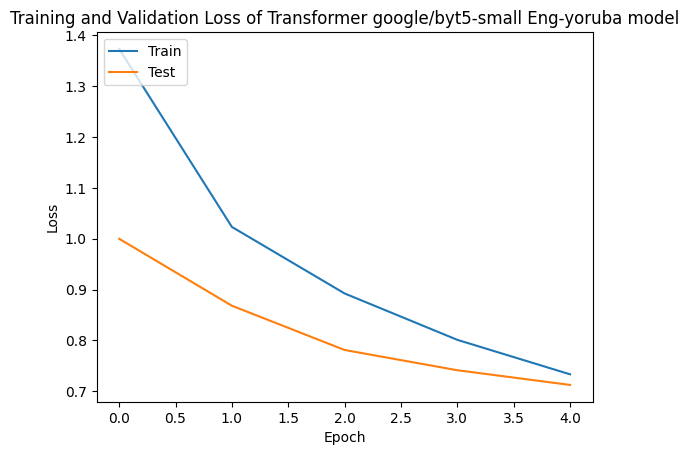

In [ ]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.title('Training and Validation Loss of Transformer google/byt5-small Eng-yoruba model')
plt.show()

dict_keys(['loss', 'val_loss'])